In [26]:
import subprocess
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# Calling the process with different number of process
# each for 10 times and storing the values in result.csv
subprocess.call(["gcc", "ass3_52.c", "-lm"])
for i in range(10):
    for j in [10, 50, 100]:
        # print ("hello i = " + str(i) + " j = "+ str(j);
        subprocess.call(["./a.out", str(j), str(i+j)]);

In [32]:
fd = pandas.read_csv('result.csv');
print(fd);


# print(result);
# average_FCFS = [0.0, 0.0,0.0];
# average_NP_SJF = [0.0, 0.0,0.0];
# average_P_SJB = [0.0, 0.0,0.0];
# average_RR = [0.0, 0.0,0.0];
# average_HRRF = [0.0, 0.0,0.0];

      n    npFCFS_r     npSJF_r      pSJF_r  roundRobin_r      hRRF_r
0    10   52.564095   39.768112   68.406265     67.157051   41.064659
1    50  161.645187  121.994431  143.409409    207.119522  115.829498
2   100  401.088165  297.430847  327.937256    509.108765  257.518036
3    10   58.529091   48.552845   62.392502     74.467918   49.221348
4    50  212.631439  139.384613  163.958878    236.604294  124.689133
5   100  435.256378  368.106445  368.906982    580.498230  296.581421
6    10   45.795719   39.247051   57.167599     59.074471   39.493065
7    50  244.661469  169.650787  215.119827    342.919647  175.189728
8   100  506.035461  426.232971  473.522552    777.228638  375.868286
9    10   57.411003   41.251026   55.972778     69.452148   42.434753
10   50  260.447906  217.389633  228.958679    362.104095  192.208466
11  100  434.213043  367.457916  388.796814    602.158569  306.667847
12   10   43.468922   35.282219   47.988739     41.275639   35.282219
13   50  275.031799 

In [33]:
result = pandas.DataFrame({'number':[10,50,100],
'FCFS':[0.0, 0.0,0.0],
'NP_SJF' : [0.0, 0.0,0.0],
'P_SJB' : [0.0, 0.0,0.0],
'RR' : [0.0, 0.0,0.0],
'HRRF' : [0.0, 0.0,0.0]});

In [34]:
ch = 0;

for i in range(30):
    if fd['n'][i] == 10:
        ch = 0;
    elif fd['n'][i] == 50:
        ch = 1;
    elif fd['n'][i] == 100:
        ch = 2;
    result['FCFS'][ch] += fd['npFCFS_r'][i];
    result['NP_SJF'][ch] += fd['npSJF_r'][i];
    result['P_SJB'][ch] += fd['pSJF_r'][i];
    result['RR'][ch] += fd['roundRobin_r'][i];
    result['HRRF'][ch] += fd['hRRF_r'][i];

for i in range(3):
    result['FCFS'][i] /= 10;
    result['NP_SJF'][i] /= 10;
    result['P_SJB'][i] /= 10;
    result['RR'][i] /= 10;
    result['HRRF'][i] /= 10;

/home/aion/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/aion/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/aion/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '

In [9]:
print(result);

   number        FCFS      NP_SJF       P_SJB          RR        HRRF
0      10   50.453236   39.853286   60.571429   64.776179   40.616307
1      50  228.976306  165.236589  195.332902  297.826996  154.483834
2     100  438.489728  365.665112  382.481976  604.221198  306.125897


In [35]:
result = result.append({'number':0, 'FCFS':0, 'NP_SJF':0, 'P_SJB':0, 'RR':0, 'HRRF':0}, ignore_index=True);

In [36]:
result.set_index('number', inplace=True)
print(result);

              FCFS      NP_SJF       P_SJB          RR        HRRF
number                                                            
10       50.453236   39.853286   60.571429   64.776179   40.616307
50      228.976306  165.236589  195.332902  297.826996  154.483834
100     438.489728  365.665112  382.481976  604.221198  306.125897
0         0.000000    0.000000    0.000000    0.000000    0.000000


In [37]:
result = result.sort_index();
print(result);

              FCFS      NP_SJF       P_SJB          RR        HRRF
number                                                            
0         0.000000    0.000000    0.000000    0.000000    0.000000
10       50.453236   39.853286   60.571429   64.776179   40.616307
50      228.976306  165.236589  195.332902  297.826996  154.483834
100     438.489728  365.665112  382.481976  604.221198  306.125897


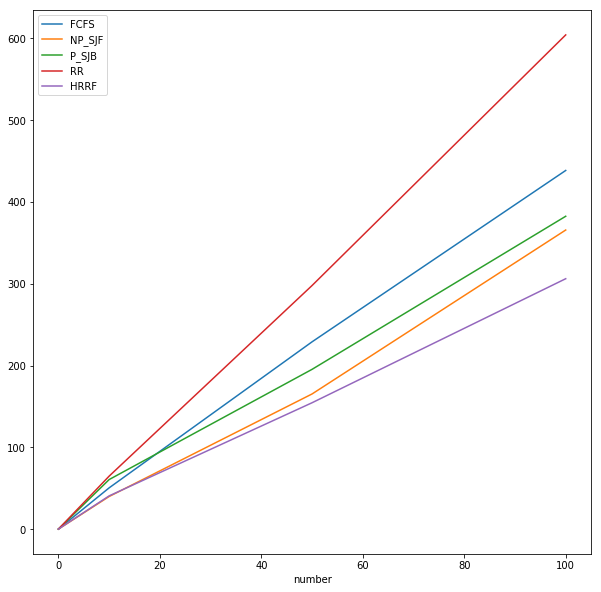

In [38]:
result_plot = result.plot(figsize=[10,10]);
fig = result_plot.get_figure();
fig.savefig("result_plot.pdf", bbox_inches='tight')
fig.savefig("result_plot.jpg", bbox_inches='tight')